In [1]:
# Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
from math import pi
# Ustawienie liczby miejsc po przecinku
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

Połączone kwestionariusze w SPSS 39 osób 

In [2]:
kwestionariusze = pd.read_csv("K:/20. PWR/04. Parsemo/Bazy danych/Pilot do publikacji/kwestionariusze/HumanNLP_kwestionariusze.csv", sep = ";", lineterminator='\n', quotechar='"', skipinitialspace=True, encoding="utf-8")
kwestionariusze.head()
kwestionariusze.dtypes

user_id              int64
FS_total             int64
HSQ_A                int64
HSQ_SE               int64
HSQ_AG               int64
HSQ_SD               int64
IPIP_Ugodowość       int64
IPIP_Ekstrawersja    int64
IPIP_Sumienność      int64
IPIP_Neurotyzm       int64
IPIP_Intelekt        int64
PAQ                  int64
PHQ_9                int64
PSS                  int64
RESS_Relaxation      int64
RESS_Engagement      int64
RESS_Rumination      int64
RESS_Reappraisal     int64
RESS_Distraction     int64
RESS_Suppression     int64
SPANE_P              int64
SPANE_N              int64
SWLS_suma            int64
PHQ_SD               int64
PHQ_H                int64
PHQ_GP               int64
PHQ_RI\r             int64
dtype: object

In [3]:
opisowe = kwestionariusze.describe()

In [4]:
print(opisowe)

       user_id  FS_total  HSQ_A  HSQ_SE  HSQ_AG  HSQ_SD  IPIP_Ugodowość  \
count    40.00     40.00  40.00   40.00   40.00   40.00           40.00   
mean     19.50     43.27  29.38   25.15   19.48   19.07           15.55   
std      11.69      5.80   5.45    6.72    4.76    5.36            2.23   
min       0.00     29.00  15.00   10.00   11.00    8.00           11.00   
25%       9.75     39.75  25.00   22.00   16.00   15.75           14.00   
50%      19.50     43.00  29.00   26.00   20.00   18.50           16.00   
75%      29.25     47.25  32.25   30.00   23.00   23.00           17.00   
max      39.00     56.00  40.00   35.00   30.00   31.00           19.00   

       IPIP_Ekstrawersja  IPIP_Sumienność  IPIP_Neurotyzm  ...  \
count              40.00            40.00           40.00  ...   
mean               12.05            15.12           12.78  ...   
std                 4.27             2.72            3.64  ...   
min                 4.00             8.00            5.00  .

In [5]:
nowe_nazwy_kolumn = {"Ośekonomiczna":"Ośekonomiczna",
"user_id                       ":"user_id                       ",
"Ośekonomiczna                 ":"Ośekonomiczna                 ",
"Ośświatopoglądowaspołeczna":"Ośświatopoglądowaspołeczna",
"Dochody":"Dochody",
"Dzieci":"Dzieci",
"Język":"Język",
"Narodowość":"Narodowość",
"Obecniestudiujesz":"Obecniestudiujesz",
"Opieka":"Opieka",
"PłećGender":"PłećGender",
"Religia":"Religia",
"Sektorzatrudnienia":"Sektorzatrudnienia",
"Statuszwiązku":"Statuszwiązku",
"Wiek":"Wiek",
"Wielkośćgospodarstwadomowego":"Wielkośćgospodarstwadomowego",
"Wykształcenie":"Wykształcenie",
"Zatrudnienie":"Zatrudnienie",
"Poglądypolityczne":"Poglądypolityczne",
"FS_total":"Flourishing",
"HSQ_A":"Affiliative humor",
"HSQ_SE":"Self-enhancing humor",
"HSQ_AG":"Aggressive humor",
"HSQ_SD":"Self-defeating humor",
"IPIP_Ugodowość":"Agreeableness",
"IPIP_Ekstrawersja":"Extraversion",
"IPIP_Sumienność":"Conscientiousness",
"IPIP_Neurotyzm":"Neuroticism",
"IPIP_Intelekt":"Intellect",
"PAQ":"Alexytymia",
"PHQ_9":"Depression",
"PSS":"Stress",
"RESS_Relaxation":"Relaxation",
"RESS_Engagement":"Engagement",
"RESS_Rumination":"Rumination",
"RESS_Reappraisal":"Reappraisal",
"RESS_Distraction":"Distraction",
"RESS_Suppression":"Suppression",
"SPANE_P":"Positive affect",
"SPANE_N":"Negative affect",
"SWLS_suma":"Satisfaction with Life",
"PHQ_SD":"Sleep Disturbance",
"PHQ_H":"Headaches",
"PHQ_GP":"Gastrointestinal Problems",
"PHQ_RI":"Respiratory Infections",
"Pomiar                        ":"Pomiar",
"updated_at                    ":"updated_at"}

In [6]:
kwestionariusze = kwestionariusze.rename(columns=nowe_nazwy_kolumn)


Radar - osobowość

In [9]:
selected_columns = ["Agreeableness", "Extraversion", "Conscientiousness","Neuroticism","Intellect"]
df_selected = kwestionariusze[selected_columns]

In [10]:
means_osobowosc = df_selected.mean()
stds_osobowość = df_selected.std()

In [11]:
categories = list(df_selected.columns)
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

NameError: name 'stds' is not defined

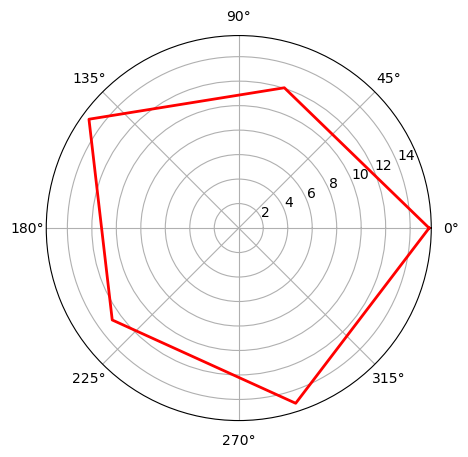

In [39]:
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))

# Plotowanie średnich wartości
values = means_osobowosc.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', color='red', label='Mean')

# Plotowanie odchyleń standardowych
values_std = stds.tolist()
values_std += values_std[:1]
ax.plot(angles, values_std, linewidth=2, linestyle='solid',  label='Standard deviation')

# Ustawienie etykiet kategorii
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Dodanie legendy
ax.legend()
# Przesunięcie legendy
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

# Ustawienie maksymalnej wartości
ax.set_rmax(20)

# Dodawanie etykiet wartości
for i, angle in enumerate(angles[:-1]):
    value = values[i]
    x = angle
    y = value + 0.5  # Przesunięcie etykiety wartości względem punktu
    ax.text(x, y, str(value), ha='center', va='center')

# Ustawienie etykiet kategorii
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10, rotation=45, ha='right',va='top')
# Przesunięcie etykiet wymiarów
ax.tick_params(axis='x', pad=20)

# Dodawanie etykiet do wartości odchyleń standardowych
for i, angle in enumerate(angles[:-1]):
    value_std = values_std[i]
    x = angle
    y = value_std + 0.1  # Przesunięcie etykiety wartości względem punktu
    ax.text(x, y, "{:.2f}".format(value_std), ha='center', va='center')

# Przesunięcie etykiety wymiaru
labels = ax.get_xticklabels()
labels[0].set_position((labels[0].get_position()[0], labels[0].get_position()[1] - 0.4))  # Przesunięcie o 0.1

# Przesunięcie etykiety wymiaru
labels = ax.get_xticklabels()
labels[4].set_position((labels[0].get_position()[0], labels[0].get_position()[1] - -0.5))  # Przesunięcie o 0.1

# Usuwanie etykiet wartości na osi y
ax.set_yticklabels([])
# Ustalenie pozycji tytułu
ax.set_title('Personality', x=0.5, y=1.1)

# Pokaż wykres
plt.show()

In [40]:
df_selected_w = df_selected.corr()

Radar - style humoru

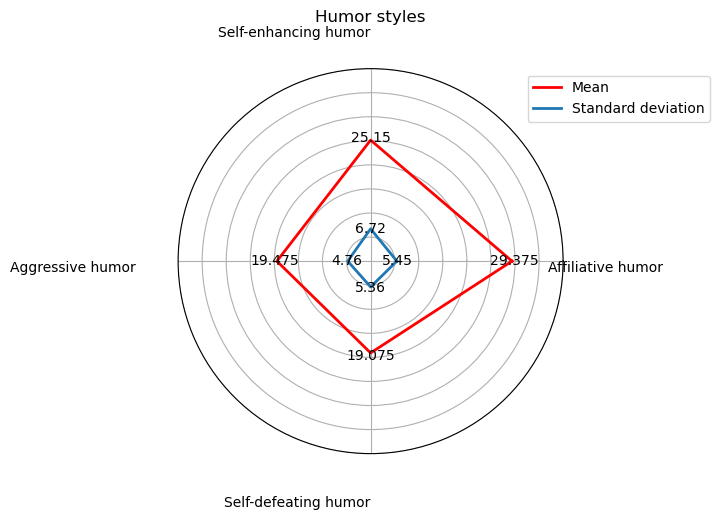

In [41]:
selected_columns_humor = ["Affiliative humor", "Self-enhancing humor", "Aggressive humor","Self-defeating humor"]
df_selected_humor = kwestionariusze[selected_columns_humor]
means_humor = df_selected_humor.mean()
stds_humor = df_selected_humor.std()
categories = list(df_selected_humor.columns)[:4]
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))

# Plotowanie średnich wartości
values = means_humor.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', color='red', label='Mean')

# Plotowanie odchyleń standardowych
values_std = stds_humor.tolist()
values_std += values_std[:1]
ax.plot(angles, values_std, linewidth=2, linestyle='solid',  label='Standard deviation')

# Ustawienie etykiet kategorii
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Dodanie legendy
ax.legend()
# Przesunięcie legendy
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

# Ustawienie maksymalnej wartości
ax.set_rmax(40)

# Dodawanie etykiet wartości
for i, angle in enumerate(angles[:-1]):
    value = values[i]
    x = angle
    y = value + 0.5  # Przesunięcie etykiety wartości względem punktu
    ax.text(x, y, str(value), ha='center', va='center')

# Ustawienie etykiet kategorii
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10, rotation=45, ha='right',va='top')
# Przesunięcie etykiet wymiarów
ax.tick_params(axis='x', pad=20)

# Dodawanie etykiet do wartości odchyleń standardowych
for i, angle in enumerate(angles[:-1]):
    value_std = values_std[i]
    x = angle
    y = value_std + 0.1  # Przesunięcie etykiety wartości względem punktu
    ax.text(x, y, "{:.2f}".format(value_std), ha='center', va='center')

# Przesunięcie etykiety wymiaru
labels = ax.get_xticklabels()
labels[0].set_position((labels[0].get_position()[0], labels[0].get_position()[1] - 0.3))  # Przesunięcie o 0.1

# Usuwanie etykiet wartości na osi y
ax.set_yticklabels([])
# Ustalenie pozycji tytułu
ax.set_title('Humor styles', x=0.5, y=1.1)

# Pokaż wykres
plt.show()

RESS - regulacja emocji

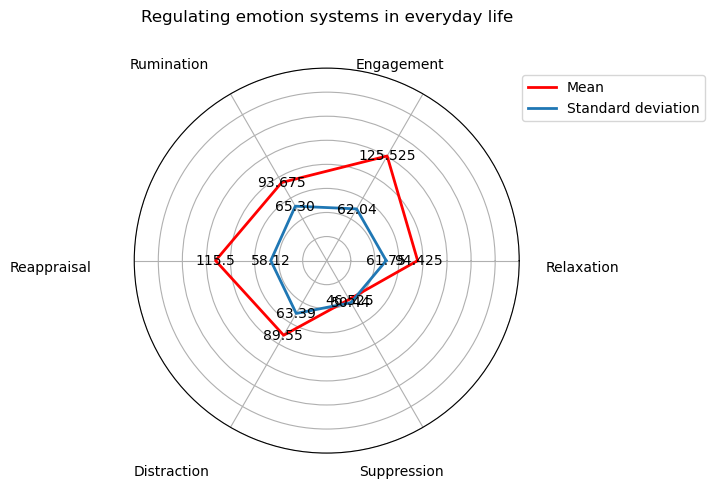

In [43]:
selected_columns_ress = ["Relaxation", "Engagement", "Rumination","Reappraisal","Distraction","Suppression"]
df_selected_ress = kwestionariusze[selected_columns_ress]
means_ress = df_selected_ress.mean()
stds_ress = df_selected_ress.std()
categories = list(df_selected_ress.columns)[:6]
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))

# Plotowanie średnich wartości
values = means_ress.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', color='red', label='Mean')

# Plotowanie odchyleń standardowych
values_std = stds_ress.tolist()
values_std += values_std[:1]
ax.plot(angles, values_std, linewidth=2, linestyle='solid',  label='Standard deviation')

# Ustawienie etykiet kategorii
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Dodanie legendy
ax.legend()
# Przesunięcie legendy
ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

# Ustawienie maksymalnej wartości
ax.set_rmax(200)

# Dodawanie etykiet wartości
for i, angle in enumerate(angles[:-1]):
    value = values[i]
    x = angle
    y = value + 0.5  # Przesunięcie etykiety wartości względem punktu
    ax.text(x, y, str(value), ha='center', va='center')

# Ustawienie etykiet kategorii
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10, rotation=45, ha='right',va='top')
# Przesunięcie etykiet wymiarów
ax.tick_params(axis='x', pad=20)

# Dodawanie etykiet do wartości odchyleń standardowych
for i, angle in enumerate(angles[:-1]):
    value_std = values_std[i]
    x = angle
    y = value_std + 0.1  # Przesunięcie etykiety wartości względem punktu
    ax.text(x, y, "{:.2f}".format(value_std), ha='center', va='center')

# Przesunięcie etykiety wymiaru
labels = ax.get_xticklabels()
labels[0].set_position((labels[0].get_position()[0], labels[0].get_position()[1] - 0.3))  # Przesunięcie o 0.1

# Usuwanie etykiet wartości na osi y
ax.set_yticklabels([])
# Ustalenie pozycji tytułu
ax.set_title('Regulating emotion systems in everyday life', x=0.5, y=1.1)

# Pokaż wykres
plt.show()

Stress and emotions -

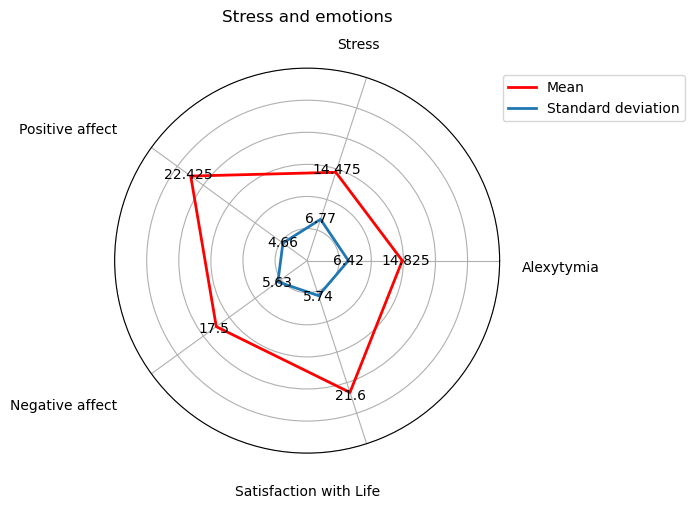

In [45]:
selected_columns_stress = ["Alexytymia", "Stress", "Positive affect","Negative affect", "Satisfaction with Life"]
df_selected_stress = kwestionariusze[selected_columns_stress]
means_stress = df_selected_stress.mean()
stds_stress = df_selected_stress.std()
categories = list(df_selected_stress.columns)[:5]
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))

# Plotowanie średnich wartości
values = means_stress.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', color='red', label='Mean')

# Plotowanie odchyleń standardowych
values_std = stds_stress.tolist()
values_std += values_std[:1]
ax.plot(angles, values_std, linewidth=2, linestyle='solid',  label='Standard deviation')

# Ustawienie etykiet kategorii
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Dodanie legendy
ax.legend()
# Przesunięcie legendy
ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

# Ustawienie maksymalnej wartości
ax.set_rmax(30)

# Dodawanie etykiet wartości
for i, angle in enumerate(angles[:-1]):
    value = values[i]
    x = angle
    y = value + 0.5  # Przesunięcie etykiety wartości względem punktu
    ax.text(x, y, str(value), ha='center', va='center')

# Ustawienie etykiet kategorii
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10, rotation=45, ha='right',va='top')
# Przesunięcie etykiet wymiarów
ax.tick_params(axis='x', pad=20)

# Dodawanie etykiet do wartości odchyleń standardowych
for i, angle in enumerate(angles[:-1]):
    value_std = values_std[i]
    x = angle
    y = value_std + 0.1  # Przesunięcie etykiety wartości względem punktu
    ax.text(x, y, "{:.2f}".format(value_std), ha='center', va='center')

# Przesunięcie etykiety wymiaru
labels = ax.get_xticklabels()
labels[0].set_position((labels[0].get_position()[0], labels[0].get_position()[1] - 0.3))  # Przesunięcie o 0.1

# Usuwanie etykiet wartości na osi y
ax.set_yticklabels([])
# Ustalenie pozycji tytułu
ax.set_title('Stress and emotions', x=0.5, y=1.1)

# Pokaż wykres
plt.show()


Health

In [ ]:
selected_columns_health = ["Depression", "Sleep Disturbance", "Headaches","Gastrointestinal Problems", "Respiratory Infections"]
df_selected_health = kwestionariusze[selected_columns_health]
means_health = df_selected_health.mean()
stds_health = df_selected_health.std()
categories = list(df_selected_health.columns)[:5]
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))

# Plotowanie średnich wartości
values = means_health.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', color='red', label='Mean')

# Plotowanie odchyleń standardowych
values_std = stds_health.tolist()
values_std += values_std[:1]
ax.plot(angles, values_std, linewidth=2, linestyle='solid',  label='Standard deviation')

# Ustawienie etykiet kategorii
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Dodanie legendy
ax.legend()
# Przesunięcie legendy
ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

# Ustawienie maksymalnej wartości
ax.set_rmax(12)

# Dodawanie etykiet wartości
for i, angle in enumerate(angles[:-1]):
    value = values[i]
    x = angle
    y = value + 0.5  # Przesunięcie etykiety wartości względem punktu
    ax.text(x, y, str(value), ha='center', va='center')

# Ustawienie etykiet kategorii
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10, rotation=45, ha='right',va='top')
# Przesunięcie etykiet wymiarów
ax.tick_params(axis='x', pad=20)

# Dodawanie etykiet do wartości odchyleń standardowych
for i, angle in enumerate(angles[:-1]):
    value_std = values_std[i]
    x = angle
    y = value_std + 0.1  # Przesunięcie etykiety wartości względem punktu
    ax.text(x, y, "{:.2f}".format(value_std), ha='center', va='center')

# Przesunięcie etykiety wymiaru
labels = ax.get_xticklabels()
labels[0].set_position((labels[0].get_position()[0], labels[0].get_position()[1] - 0.3))  # Przesunięcie o 0.1

# Usuwanie etykiet wartości na osi y
ax.set_yticklabels([])
# Ustalenie pozycji tytułu
ax.set_title('Health', x=0.5, y=1.1)

# Pokaż wykres
plt.show()

[Text(0.5, 1.0, 'Stres')]

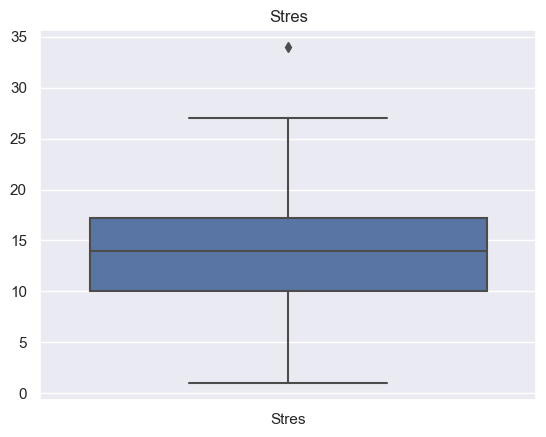

In [64]:
#Stres
sns.boxplot(data = kwestionariusze.loc[:, ["Stres"]]).set(title="Stres")